<a href="https://colab.research.google.com/github/rodrigo-fernandes092/Learning/blob/main/Estudo_Fundamentos_de_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados

In [ ]:
house = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# **Fundamentos de Estatística**

##**Tipos de variáveis**

### **Qualitativas**
**Qualitativas**: são variáveis não métricas,


 * Podem atribuir duas ou mais categorias

 *A análise descritiva de variáveis qualitativas é feita por meio de tabelas de frequência e gráficos, pois tais variáveis não permitem o cálculo de medidas de posição e dispersão
**negrito**

###**Quantitativas**
São variáveis métricas, atribuem contagem ou mensuração
* Podem ser discretas ou contínuas

* A análise descritiva de variáveis quantitativas pode ser feita por diversas ferramentas estatísticas, incluindo as medidas de posição e dispersão


## **1 - Tabela de Frequências**





 * **Frequência absoluta**: contagem de ocorrências em cada
categoria

* **Frequência relativa**: percentual de cada categoria em relação ao total de observações

* **Frequência acumulada**: soma da frequência absoluta a cada nova categoria

* **Frequência relativa acumulada**: soma da frequência relativa a cada nova categoria





In [ ]:
# Criando Tabela de Frequências

tab_freq = pd.DataFrame(house.\
                        pivot_table(
                            index='housing_median_age',\
                            values='total_rooms',\
                            aggfunc='count')).\
                            sort_values(by='housing_median_age',ascending=True)

tab_freq.rename(columns={'total_rooms':'Frequencia_Absoluta'},inplace=True) # Renomeando

tab_freq['Frequencia_Relativa'] = ((
    tab_freq.Frequencia_Absoluta/tab_freq.Frequencia_Absoluta.sum())*100).round(2)

tab_freq['Frequencia_Acumulada'] = (
    tab_freq.Frequencia_Absoluta.cumsum())

tab_freq['Frequencia_Relativa_Acumulada'] = (
    tab_freq.Frequencia_Relativa.cumsum())


tab_freq.head(50)

,Frequencia_Absoluta,Frequencia_Relativa,Frequencia_Acumulada,Frequencia_Relativa_Acumulada
housing_median_age,,,,
1.0,2,0.01,2,0.01
2.0,49,0.29,51,0.30
3.0,46,0.27,97,0.57
4.0,161,0.95,258,1.52
5.0,199,1.17,457,2.69
6.0,129,0.76,586,3.45
7.0,151,0.89,737,4.34
8.0,178,1.05,915,5.39
9.0,172,1.01,1087,6.40


### Gráficos representando Tabela de Frequência

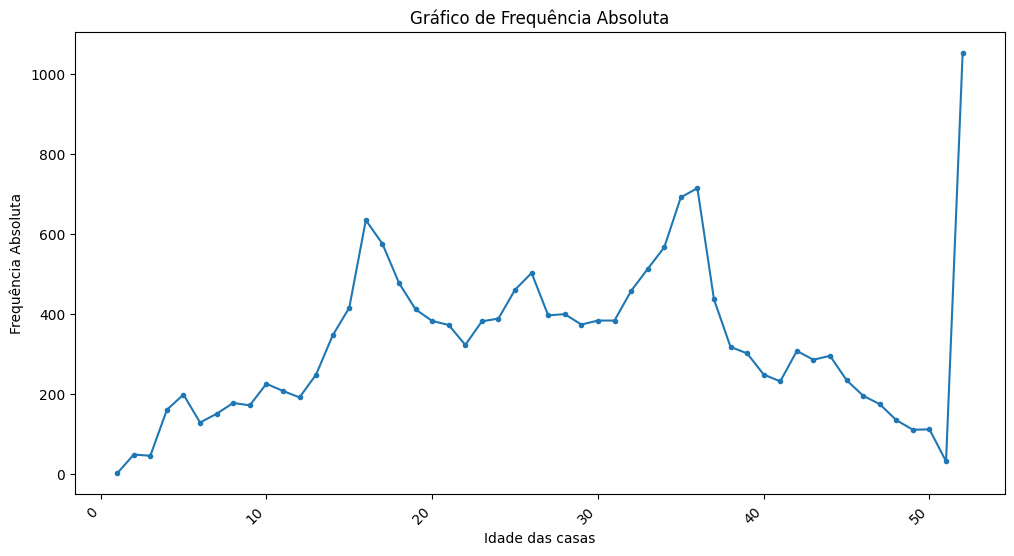

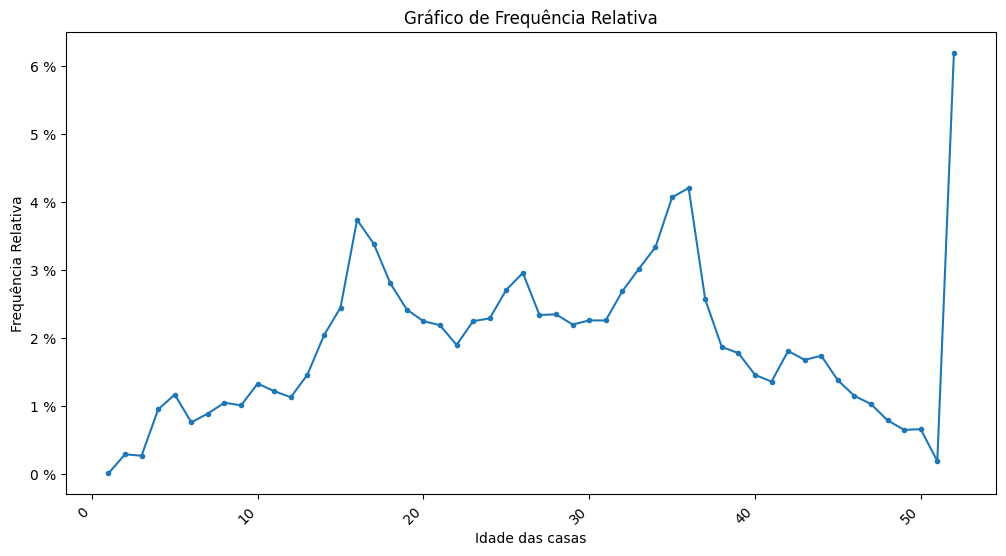

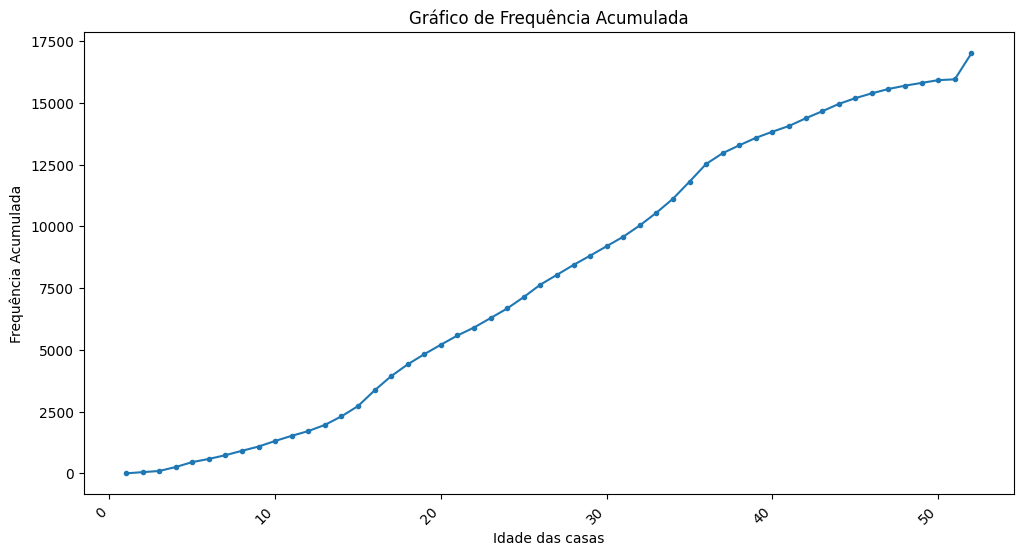

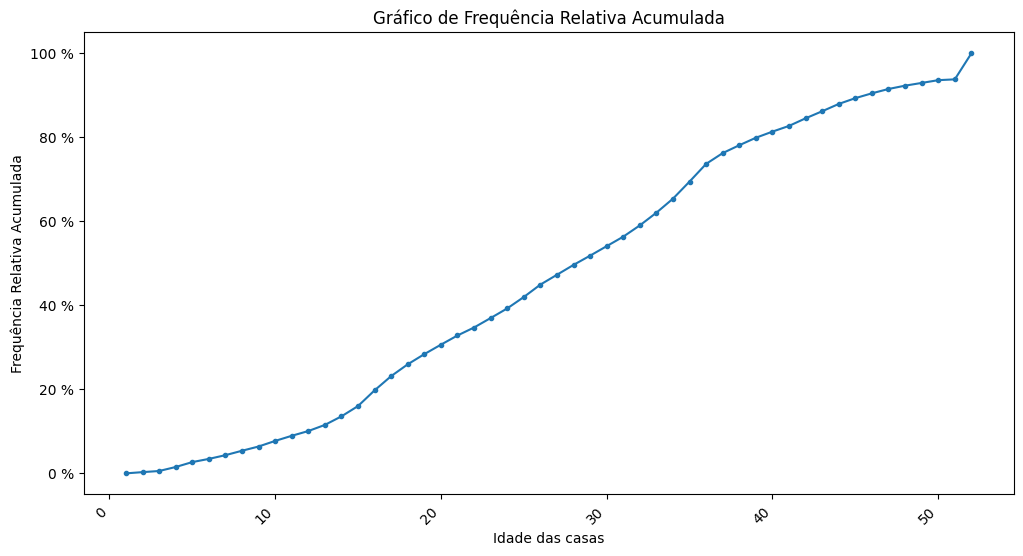

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Absoluta'], marker='.')
plt.xlabel('Idade das casas')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Absoluta')
plt.title('Gráfico de Frequência Absoluta')
plt.grid(False)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Relativa'], marker='.')
plt.xlabel('Idade das casas')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Relativa')
plt.title('Gráfico de Frequência Relativa')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(False)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Acumulada'], marker='.')
plt.xlabel('Idade das casas')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Acumulada')
plt.title('Gráfico de Frequência Acumulada')
plt.grid(False)
plt.show()




plt.figure(figsize=(12, 6))
plt.plot(tab_freq['Frequencia_Relativa_Acumulada'], marker='.')
plt.xlabel('Idade das casas')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Frequência Relativa Acumulada')
plt.title('Gráfico de Frequência Relativa Acumulada')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} %'))
plt.grid(False)
plt.show()


## **2 - Medidas de Dispersão**

### **Média**
É média aritmética simples para a variável, ou seja, é
a soma dos valores (Xi) contidos na variável dividido pela quantidade total de observações (n)

 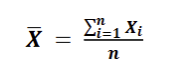




In [ ]:
print('A idade média das casas é de  '+ \
      str(house.housing_median_age.mean().round(2)) + ' anos')

A idade média das casas é de  28.59 anos


### **Mediana**

* É o elemento central da distribuição da variável, considerando que a variável esteja com seus n valores organizados de forma crescente


* Metade dos valores da variável são maiores ou iguais ao valor da mediana e metade dos valores são menores ou iguais ao valor da mediana

 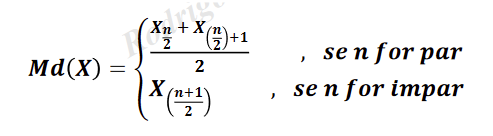

In [ ]:
print('A idade mediana das casas é de '+ \
      str(house.housing_median_age.median().round(2))+ ' anos')

A idade mediana das casas é de 29.0 anos


### **Moda**
* É o valor que aparece com maior frequência nas observações de uma variável

* A moda também pode ser calculada para dados qualitativos

* É possível que não exista a moda de uma variável (especialmente, se for uma variável contínua)


In [ ]:
print('A idade da casa com maior frequência é de {} anos'.format(house.housing_median_age.mode()[0]))


A idade da casa com maior frequência é de 52.0 anos


### **Quartis**

* São os elementos da distribuição da variável que dividem as observações em quatro partes iguais, considerando que a variável esteja com seus valores organizados de forma crescente

 * 1º Quartil: 25% das observações são menores do que o 1º quartil
 * 2º Quartil: trata-se da mediana
 * 3º Quartil: 25% das observações são maiores do que o 3º quartil

 * 1º Quartil = 25º Percentil
 * 2º Quartil = 50º Percentil
 * 3º Quartil = 75º Percenti


In [ ]:
house.housing_median_age.quantile([0.25,0.5,0.75]).round(2)



,housing_median_age
0.25,18.0
0.50,29.0
0.75,37.0




> O valor do 2° Quartil é o mesmo da mediana de 29 anos



## **3. Medidas de Dispersão**


### **Amplitude**
* Apresenta a diferença entre o valor máximo e o valor mínimo de uma variável


In [ ]:
print('A amplitude da idade das casas é de {} '\
      .format(house.housing_median_age.max() \
              - house.housing_median_age.min()))

A amplitude da idade das casas é de 51.0 


### **Variância**

* Mostra a dispersão das observações de uma variável em torno de sua média

* Maior a variância, maior a dispersão dos valores em torno da média,
* Menor a variância, menor a dispersão dos valores em torno da média


In [ ]:
print('A variância da idade das casas é de {} '.\
      format(house.housing_median_age.var().round(2)))


A variância da idade das casas é de 158.43 


### **Desvio Padrão**
* É uma medida derivada da variância, tornando mais simples a interpretação da dispersão em torno da média
  * A variância é definida em termos quadrados, o que dificulta a interpretação
* O desvio padrão é a raiz quadrada da variância

>* maior a Desvio padrão, maior a dispersão dos valores em torno da  média.
>
>* menor a Desvio padrão, menor a dispersão dos valores em torno da média


In [ ]:

print('O Desvio Padrão da idade das casas é de '+\
      str(house.housing_median_age.std().round(2)))

O Desvio Padrão da idade das casas é de 12.59


### **Erro padrão**

* É o desvio padrão da média da variável

 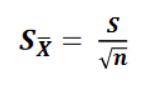

* Sendo que S é o desvio padrão da variável e n o tamanho da amostra

* Quanto maior o tamanho da amostra, menor o erro padrão na estimativa da média da variável → mais precisa é a média estimada


In [ ]:

print('O Erro Padrão da idade das casas é de ' + \
      str((house.housing_median_age.std() / np.sqrt(len(house.housing_median_age))).round(2)))


O Erro Padrão da idade das casas é de 0.1


### **Coeficiente de variação**
* medida de dispersão relativa, usado para comparar amostras diferentes com grandezas e medidas distintas.

* É uma medida de dispersão relativa, pois relaciona o desvio padrão e a média de uma variável

* Pode ser utilizada para realizar comparações entre amostras de diferentes grandezas, por exemplo

* Quanto menor o CV, mais homogêneos são os valores da variável e mais concentrados estão os valores em torno da média

 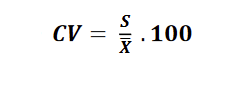


In [ ]:

column = ['housing_median_age', 'total_rooms',
          'total_bedrooms', 'population',
          'households', 'median_income',
          'median_house_value']

for column in house[column]:
  print('O coeficiente de variação da coluna {} é: '.format(column) + \
      str(((house[column].std() / house[column].mean()) * 100).round(2)) + '%')


O coeficiente de variação da coluna housing_median_age é: 44.03%
O coeficiente de variação da coluna total_rooms é: 82.46%
O coeficiente de variação da coluna total_bedrooms é: 78.14%
O coeficiente de variação da coluna population é: 80.29%
O coeficiente de variação da coluna households é: 76.72%
O coeficiente de variação da coluna median_income é: 49.13%
O coeficiente de variação da coluna median_house_value é: 55.95%
